# Predicting Gout During Emergency Room Visit: 
## <i>Is the patient potentially suffering from Gout?</i>  

## Scope

The scope of this project is corpora from the Deep South.  The demographics of the population from which they were derived are 54% female, and 46% male, 55% Black, 40% White, 2% Hispanic, and 1% Asian. Age distribution was 5% between ages 1-20 years, 35% between ages 21-40 years, 35% between ages 41-60 years, 20% between ages 61-80 years, and 5% between ages 81-100 years.

## Data

The data is extracted in csv format from the MIMIC-III (Medical Information Mart for Intensive Care III) database.  Details can be found at https://physionet.org/content/emer-complaint-gout/1.0/.   Acces to the database may be requested at (https://mimic.physionet.org/gettingstarted/access/). 

The data provided by the MIMIC database consists of 2 corpora of free text collected by the triage nurse and recorded as the "Chief Complaint".  Each complaint contains up to 282 characters in length and was collected from 2019 to 2020 at an academic medical center in the Deep South.  The 2019 corpora, "GOUT-CC-2019-CORPUS", consists of 300 chief complaints selected by the presence of the keyword "gout". The 2020 corpora, "GOUT-CC-2020-CORPUS" contains 8037 chief complaints collected from a single month in 2020. The chief complaints included in both corpora were selected based on the presence of the keyword "gout".

## Import and Clean Data
   * Import 2 csv files
   * Combine files into a single dataframe
   * Remove records that contain null values in both of the Predict and Consensus columns.
   * Fill Consensus null values ( - ) with Predict values

***Import Data***

In [1]:
import pandas as pd
syn2019 = pd.read_csv('Data/GOUT-CC-2019-CORPUS-SYNTHETIC.csv')
syn2020 = pd.read_csv('Data/GOUT-CC-2020-CORPUS-SYNTHETIC.csv')

**Data Description**
* 2 csv files
    * 2019 : 300 records
    * 2020 : 8037 records
    * Identical layouts and formats: all text, 3 columns
    <br><br>
* 3 Columns:  ["Chief Complaint", "Predict", "Consensus"]
    * <b>Chief Complaint:</b> 
        * text format
        * up to 282 Chars
        * nurse recorded patient complaint
    * <b>Predict:</b> 
        * text format
        * single char ('-','U','Y','N')
        * prediction of Gout by the ER Physician
    * <b>Consensus:</b> 
        * textformat
        * single char ('-','U','Y','N')
        * determination of Gout by the Rhuematologist
    <br>
* 
          - : Null
          U : Unknonw
          Y : Yes
          N : Gout

***Review Data***

In [2]:
#. 2019 Data Import
print(syn2019.head())
print("\nShape of 2019 data: ",syn2019.shape)

                                     Chief Complaint Predict Consensus
0  "been feeling bad" last 2 weeks & switched BP ...       N         -
1  "can't walk", reports onset at 0830 am. orient...       Y         N
2  "dehydration" Chest hurts, hips hurt, cramps P...       Y         Y
3  "gout flare up" L arm swelling x 1 week. denie...       Y         Y
4  "heart racing,"dyspnea, and orthopnea that has...       N         -

Shape of 2019 data:  (300, 3)


In [3]:
# 2020 Data Import
print(syn2020.head())
print("\nShape of 2020 data: ",syn2020.shape)

                                     Chief Complaint Predict Consensus
0  "I dont know whats going on with my head, its ...       N         -
1  "i've been depressed for a few weeks now, i'm ...       N         -
2  Altercation while making arrest, c/o R hand pa...       N         N
3  Cut on L upper thigh wtih saw. Bleeding contro...       N         N
4   Dysuria x1 week. hx: hysterectomy, gerd, bipolar       N         -

Shape of 2020 data:  (8137, 3)


***The files have an identical layout, combine into 1 dataframe***

In [4]:
# Combine the files into 1 dataframe
df = pd.concat([syn2019, syn2020], axis=0).reset_index(drop=True)
df.shape

(8437, 3)

### Hold-out set Creation
I decided to hold out half of the records that were filled in, validated, by the panel and therefore contained a 'y' or 'n' in the consensus column.  This set will not be included in the training and testing.  the final model will then run the hold out set and give us a peek into the models real-world performance by comparing apples to apples.

In [5]:
df_hold =  df[(df.Consensus == '-') | (df.Consensus == 'U')]   # slice and hold the concensus values are null
df_C = df[(df.Consensus == 'Y') | (df.Consensus == 'N')]       # create dataframe of records with consensus values
df_C = df_C[(df_C.Predict == 'Y') | (df_C.Predict == 'N')]

In [6]:
print(df_C['Consensus'].value_counts())                        # Take a look at the count
print(df_hold.shape)
df_hold['Consensus'].value_counts()

N    223
Y     80
Name: Consensus, dtype: int64
(7992, 3)


-    7976
U      16
Name: Consensus, dtype: int64

In [7]:
import sklearn.utils
df_C = sklearn.utils.shuffle(df_C)
df_C.shape

(303, 3)

In [8]:
#df_C_N = df_C.sort_values(by = 'Consensus', ascending = True)
#df_C_Y = df_C.sort_values(by = 'Consensus', ascending = False)

df_val = df_C[0:9]
df_train = df_C[10:444]

In [9]:
print(df_val['Consensus'].value_counts())
print(df_train['Consensus'].value_counts())

N    7
Y    2
Name: Consensus, dtype: int64
N    216
Y     77
Name: Consensus, dtype: int64


In [10]:
print(df_train.shape)
print(df_hold.shape)

(293, 3)
(7992, 3)


In [11]:
df_train = pd.concat([df_train, df_hold], axis=0).reset_index(drop=True)
print(df_train.shape)
print(df_train['Consensus'].value_counts())



(8285, 3)
-    7976
N     216
Y      77
U      16
Name: Consensus, dtype: int64


In [12]:
df_val.shape
df_val

,Chief Complaint,Predict,Consensus
250,"sent by MD to make sure ""not in kidney failure...",N,N
109,"intermittant SOB x 2wks, denies CP, 97% RA, bi...",N,N
196,"Pt endorses SI, sent by MD for worsening SI, p...",N,N
1155,"non productive cough, sore throat, sinus conge...",N,N
166,"Poss seizure today, pt reports numbeness and t...",N,N
185,"pt c/o leg pn, unable to ambulate x4 weeks, de...",Y,Y
265,Severe left ankle pain. Possible gout flare p...,Y,Y
8311,"Leg pain, has wounds to right leg after MVC th...",N,N
8292,"Fell asleep on left arm several days ago, left...",N,N


Before we drop the predict column, lets count the number the ER physican was in disagreement with the panel for this set of data

In [13]:
#slice df where Consensus is Yes or No
z = df_val.Predict == df_val.Consensus
y = df_val.Predict != df_val.Consensus
print('ER Physician prediction disagrees with Panel:', sum(y))
print('ER Physician prediction agrees with Panel:', sum(z))


ER Physician prediction disagrees with Panel: 0
ER Physician prediction agrees with Panel: 9


In [14]:
#slice df where Consensus is Yes or No
z = df_train.Predict == df_train.Consensus
y = df_train.Predict != df_train.Consensus
print('ER Physician prediction disagrees with Panel:', sum(y))
print('ER Physician prediction agrees with Panel:', sum(z))

ER Physician prediction disagrees with Panel: 8008
ER Physician prediction agrees with Panel: 277


In [15]:
# Slice the dataframe to compare only the Y & N in Consensus, looking for how often Predict disagrees with the Rhuematologist (Consensus)

#slice df where Consensus is Yes or No
yesNo = df_val[(df_val['Consensus'] == 'Y') | (df_val.Consensus == 'N')]
# Reset the index
yesNo.reset_index(drop=True, inplace=True)

c = []
for i, j in yesNo.iterrows():
    if (j[1] != j[2]):
        c.append("Disagree")
    else:
        c.append("Agree")
county = c.count('Agree')
countN = c.count('Disagree')
print("Agree:",county)
print("Disagree:",countN)
print("Total: ",county+countN)

Agree: 9
Disagree: 0
Total:  9


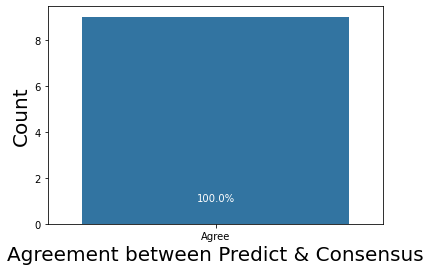

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

df_count = pd.DataFrame(c,columns=['Count'])
base_color = sns.color_palette()[0]
sns.countplot(data = df_count, x = 'Count')

# add annotations
n_points = df_count.shape[0]
match_counts = df_count['Count'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = match_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'w')
#plt.legend(labels=["Agree","Disagree"], title = "Results Agreement")
plt.ylabel('Count', fontsize=20)
plt.xlabel('Agreement between Predict & Consensus', fontsize=20)
plt.show()

In [136]:
# can drop the predict column for the validation set at this point
df_val = df_val.drop(columns=['Predict'])
df_val = df_val.rename(columns={'Chief Complaint': 'corpus', 'Consensus': 'target'})

In [137]:
df_val.shape

(9, 2)

In [138]:
# rename the training set back to df
df = df_train

### The consensus column will need to be imputed by the predict column for the taining set df_train

*** How many patient records have null values in both potential targets, Predict and Consensus? ***

In [139]:
countNull = df[(df.Consensus == '-') & (df.Predict == '-')]
countUnknown = df[(df.Consensus == 'U') & (df.Predict == 'U')]
print("Shape of '-' :",countNull.shape,"   Shape of 'U':", countUnknown.shape)
print(countNull, countUnknown)

Shape of '-' : (2, 3)    Shape of 'U': (12, 3)
                                        Chief Complaint Predict Consensus
7712  Right lower back pain that radiates down leg t...       -         -
7770  pain to posterior upper leg x 3 days, seen at ...       -         -                                         Chief Complaint Predict Consensus
314   cannot bend R knee after twisting 2 days ago. ...       U         U
326   dog scratch to left thumb PMH VP shunt, brain ...       U         U
329   Fall 6 x in 24 hours due to lower extremity we...       U         U
345   L thumb open wound, draining serosangunous flu...       U         U
383   right shoulder pain/redness/swellig x 3 days, ...       U         U
923   pt c/o R foot pain x5 hours. mild swelling not...       U         U
5157  Was drinking soda out of a glass bottle and fe...       U         U
5384  Rright srist/hand pain x 4 days. Velcro splint...       U         U
6008  right ankle. lower leg pain and swelling per p...       U  

*** Remove the 14 Null records **

In [140]:
df = df[(df.Consensus != '-') | (df.Predict != '-')]
df = df[(df.Consensus != 'U') & (df.Predict != 'U')]
print("Consensus shape:\n",df.Consensus.value_counts(),"\nPredict shape\n ",df.Predict.value_counts())
print("\nPredict shape\n ",df.Predict.value_counts())
df

Consensus shape:
 -    7972
N     216
Y      77
Name: Consensus, dtype: int64 
Predict shape
  N    8157
Y     108
Name: Predict, dtype: int64

Predict shape
  N    8157
Y     108
Name: Predict, dtype: int64


,Chief Complaint,Predict,Consensus
0,"increased pain and swelling to R upper arm, se...",N,N
1,MVC 1 hr PTA. pt c/o chest and neck pain. curr...,N,N
2,"right knee pain and swelling x 2 days, on exam...",Y,N
3,alleged assault by son's father that happened ...,N,N
4,bilateral knee pain since last pm. pt denies t...,N,N
...,...,...,...
8280,"sore throat, hurts to swallowx3 days, hoarsnes...",N,-
8281,"states increase blood sugar, nausea, dizziness...",N,-
8282,""" I was having a breakdown."" R/T stress and de...",N,-
8283,"""I tried to jump in front of a car"" Pt states ...",N,-


***We will combine the Predict and Null columns, keeping the Consensus values and filling the null value within from the Predict column.  First let's look at how often Predict and Consensus are in disagreement.***

In [141]:
# Slice the dataframe to compare only the Y & N in Consensus, looking for how often Predict disagrees with the Rhuematologist (Consensus)

#slice df where Consensus is Yes or No
yesNo = df[(df['Consensus'] == 'Y') | (df.Consensus == 'N')]
# Reset the index
yesNo.reset_index(drop=True, inplace=True)

c = []
for i, j in yesNo.iterrows():
    if (j[1] != j[2]):
        c.append("Disagree")
    else:
        c.append("Agree")
county = c.count('Agree')
countN = c.count('Disagree')
print("Agree:",county)
print("Disagree:",countN)
print("Total: ",county+countN)

Agree: 263
Disagree: 30
Total:  293


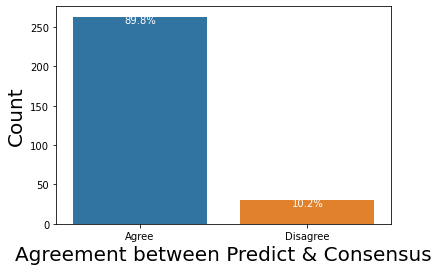

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

df_count = pd.DataFrame(c,columns=['Count'])
base_color = sns.color_palette()[0]
sns.countplot(data = df_count, x = 'Count')

# add annotations
n_points = df_count.shape[0]
match_counts = df_count['Count'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = match_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'w')
#plt.legend(labels=["Agree","Disagree"], title = "Results Agreement")
plt.ylabel('Count', fontsize=20)
plt.xlabel('Agreement between Predict & Consensus', fontsize=20)
plt.show()

### Target Value Determination for a single binomial target:

For this project we are using a single binomial target.  The 'Predict' column values were reported by the ER physician treating the patient.  In comparison, the 'Consensus' values were reported by a rhuematologist when seen by a specialist.  Therefore the consensus value was considered more accurate and the consensus column chosen for the target values with the empty (-) values filled by the 'Predict' column. 

In [143]:
# REPLACE NULL VALUES IN 'Consensus' WITH THE 'Predict' VALUES
for a in df['Consensus']:
    if a == '-':
        df['Consensus'] = df['Predict']
        
        # DROP THE 'Predict' COLUMN
df = df.drop(columns=['Predict'])

# Review results
df.describe(include='all')

,Chief Complaint,Consensus
count,8265,8265
unique,8258,2
top,Sent from Bibb Medical Center for bilateral le...,N
freq,2,8157


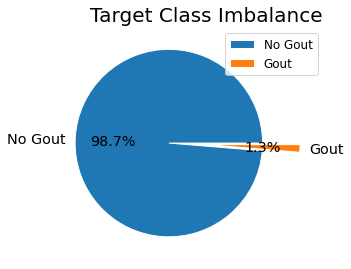

In [144]:
# Visualize class balance

fig, ax = plt.subplots(figsize=(5,6))
classes = df.Consensus.value_counts()
labels = ['No Gout', 'Gout']
explode = [0.4, 0]
ax.pie(classes, labels=labels, explode = explode, autopct='%.1f%%',wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'})
ax.set_title('Target Class Imbalance', fontsize=20)
plt.legend(fontsize=12)
plt.tight_layout()

In [145]:
df['Consensus'].value_counts()

N    8157
Y     108
Name: Consensus, dtype: int64

### Rename columns and store dataframe as csv for use in BERT noteook

In [146]:
df = df.rename(columns={'Chief Complaint': 'corpus', 'Consensus': 'target'})
df

# store the cleaned data for use in a BERT Pretrained model
df.to_csv('df.csv', index=False)
df.head(3)

,corpus,target
0,"increased pain and swelling to R upper arm, se...",N
1,MVC 1 hr PTA. pt c/o chest and neck pain. curr...,N
2,"right knee pain and swelling x 2 days, on exam...",Y


In [147]:
df['target'].value_counts()

N    8157
Y     108
Name: target, dtype: int64

## Preprocessing

   * Clean Text
   * Remove the key term "Gout" from corpus
   * Tokenize
   * Remove Stop Words
   * Lemmitization
   * Stemming

### Clean Text

In [148]:
import re
import string

def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)                               # remove brackets [ ]
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # remove punctuation
    text = re.sub('\w*\d\w*', '', text)                              # remove digits embedded in words
    text = re.sub('[‘’“”…]', '', text)                               # remove quotes
    text = re.sub('\n', '', text)                                    # remove newlines
    return text

cleaning = lambda x: clean_text(x)

In [149]:
# Let's take a look at the updated text
df['corpus'] = pd.DataFrame(df['corpus'].apply(cleaning))
df_val['corpus'] = pd.DataFrame(df_val['corpus'].apply(cleaning))

### Tokenize into sentences: nltk RegexpTokenizer

In [150]:
import nltk
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("[\w']+")

In [151]:
df['corpus'] = df['corpus'].apply(lambda x: tokenizer.tokenize(x.lower()))
df_val['corpus'] = df_val['corpus'].apply(lambda x: tokenizer.tokenize(x.lower()))

In [152]:
df.head(5)
df_val.head(5)

,corpus,target
228,"[r, hand, painswelling, days, i, think, its, m...",Y
4430,"[sent, by, pcp, for, blood, and, clots, in, ur...",N
100,"[gout, flareup, to, l, days, does, not, take, ...",Y
434,"[left, calf, thigh, hip, pain, days, denies, i...",N
8400,"[dc, today, with, uti, blood, in, urine, pain,...",N


### Stopwords: nltk.corpus

In [153]:
from nltk.corpus import stopwords
#nltk.download('stopwords')
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words

In [154]:
df['corpus'] = df['corpus'].apply(lambda x : remove_stopwords(x))
df_val['corpus'] = df_val['corpus'].apply(lambda x : remove_stopwords(x))
df['corpus'].head()
df

,corpus,target
0,"[increased, pain, swelling, r, upper, arm, see...",N
1,"[mvc, hr, pta, pt, co, chest, neck, pain, curr...",N
2,"[right, knee, pain, swelling, x, days, exam, k...",Y
3,"[alleged, assault, sons, father, happened, app...",N
4,"[bilateral, knee, pain, since, last, pm, pt, d...",N
...,...,...
8280,"[sore, throat, hurts, days, hoarsness, reports...",N
8281,"[states, increase, blood, sugar, nausea, dizzi...",N
8282,"[breakdown, rt, stress, depression]",N
8283,"[tried, jump, front, car, pt, states, psych, m...",N


In [155]:
analysis = df.copy(deep=True)  # store a copy for the wordcloud prior to lemmatization

### Lemmatization: WordNetLemmatizer

In [156]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [157]:
def word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize(i) for i in text]
    return lem_text

In [158]:
df['corpus'].apply(lambda x: word_lemmatizer(x))
df_val['corpus'].apply(lambda x: word_lemmatizer(x))

228     [r, hand, painswelling, day, think, gout, also...
4430    [sent, pcp, blood, clot, urine, denies, pain, ...
100     [gout, flareup, l, day, take, medication, gout...
434     [left, calf, thigh, hip, pain, day, denies, in...
8400    [dc, today, uti, blood, urine, pain, left, sid...
238     [right, foot, right, knee, pain, think, gout, ...
8333    [r, arm, laceration, post, hitting, mirror, la...
6077    [fell, last, tuesday, went, highland, xrays, r...
328     [co, right, calf, swelling, patient, right, kn...
Name: corpus, dtype: object

### Stemming: PorterStemmer

In [159]:
from nltk.stem.porter import PorterStemmer
#from nltk.stem.porter import *
stemmer = PorterStemmer()

In [160]:
def word_stemmer(text):
    stem_text = ' '.join([stemmer.stem(i) for i in text])
    return stem_text

In [161]:
df['corpus'] = df['corpus'].apply(lambda x: word_stemmer(x))
df_val['corpus'] = df_val['corpus'].apply(lambda x: word_stemmer(x))
df

,corpus,target
0,increas pain swell r upper arm seen monday,N
1,mvc hr pta pt co chest neck pain current blood...,N
2,right knee pain swell x day exam knee visib sw...,Y
3,alleg assault son father happen appx hr pta st...,N
4,bilater knee pain sinc last pm pt deni trauma ...,N
...,...,...
8280,sore throat hurt day hoars report cold like mo...,N
8281,state increas blood sugar nausea dizzi weak th...,N
8282,breakdown rt stress depress,N
8283,tri jump front car pt state psych med pmh arth...,N


### END OF CLEANING....Store dataframe for modeling

In [162]:
import pandas as pd
import pickle
pd.to_pickle(df, 'withGoutTermII.csv')
pd.to_pickle(df_val, 'validation.csv')

## ANALYSIS
* Wordcloud
* Word Count
* Visual comparisons of word frequencies

In [ ]:
# Split the data by the target class

yes_gout = df.loc[df['target'] == 'Y']
no_gout = df.loc[df['target'] == 'N']

In [ ]:
# Define method that vectors data and plots the word count in a bar plot
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


# Set Font for Charts

fontT = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 45,
        }
fontL = {'family': 'serif',
        'color':  'green',
        'weight': 'normal',
        'size': 25,
        }

def plotChart(corpus, title):
    vectorizer = CountVectorizer(ngram_range=(1, 1))
    vectorized = vectorizer.fit_transform(corpus.astype(str))
    vectored_data = pd.DataFrame.sparse.from_spmatrix(vectorized, columns=vectorizer.get_feature_names())

    allData = vectored_data.sum(axis=0)
    allData = allData.sort_values(ascending=False).head(30)

        #plot
    plt.figure(figsize=(20, 10))
    plt.title(title, fontdict = fontT)
    plt.xlabel("Count", fontdict = fontL)
    plt.ylabel("Patient Complaints", fontdict = fontL)
    plt.yticks(size=25)
    allData.plot.barh()
    return allData.sort_values(ascending=False)

def plotWordcloud(words, title):
    words = WordCloud(background_color="white").fit_words(words)
    plt.figure(figsize = (10,20))
    plt.imshow(words, interpolation='bilinear')
    plt.title(title, fontdict = fontT)
    plt.axis("off")
    plt.show()

In [ ]:
# Plot word count for complete corpus:  plotChart

title = "Word Count for Complete Corpus"
allof = plotChart(df['corpus'],title)

In [ ]:
title = "Full Corpus"
plotWordcloud(allof, title)

In [ ]:
title = "Word Count for Patients WITH Gout"
yes = plotChart(yes_gout['corpus'], title)

In [ ]:
title = "Patients with Gout"
plotWordcloud(yes, title)

In [ ]:
title = "Word Count for Patients WITHOUT Gout"
noGout = plotChart(no_gout['corpus'], title)

In [ ]:
title = "Patients without gout complaints"
plotWordcloud(noGout, title)

### Visual comparisons of word frequencies: Compare words used by Gout patients vs patients without Gout

In [ ]:
# Convert list to dataframe
noGout = noGout.to_frame().reset_index()
yes = yes.to_frame().reset_index()

# Add new column "Gout"
noGout['Gout'] = 'n'
yes['Gout'] = 'y'

 # Set the first column name to 'count'
noGout = noGout.rename(columns={0: 'count'}) 
yes = yes.rename(columns={0: 'count'})

# Normalize the count to account for class imbalances
sumN = noGout['count'].sum()                               
sumY = yes['count'].sum()
noGout['count'] = noGout['count'].apply(lambda x: x/sumN)
yes['count'] = yes['count'].apply(lambda x: x/sumY)

# Combine all data into single df for plotting
compare = pd.concat([noGout, yes])

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

sns.kdeplot(
   data=compare, x="count", hue="Gout",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0
)


In [ ]:
# Plot the comparisons

import seaborn as sns
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="count", y="index", hue="Gout", ax=ax, data=compare)
ax.set_title("Compare wordcount Gout vs Non-Gout Patients",fontsize=20)
ax.set_xlabel("Word count for corpa",fontsize=20)
ax.set_ylabel("Word used by patient",fontsize=30)
ax.legend(fontsize = 15, \
               bbox_to_anchor= (1.03, 1), \
               title="Gout?", \
               title_fontsize = 18, \
               shadow = True, \
               facecolor = 'white');

### We see a nice separation of tokens with the expected overlap of 'pain, left, right, and dm (diabetes), with separations occuring on lung and abdominal complaints versus swelling and joint complaints.  Looks good

### Distribution of Word Count for Gout vs non-Gout patients

In [ ]:
print(yes)

In [ ]:
fig, ax = plt.subplots(1, 2)

yesis = yes['count'].to_list()
nois = noGout['count'].to_list()

ax[0].hist(yesis, bins=30, alpha = 0.9, color = 'r')
ax[1].hist(nois, bins=30, alpha = 0.9, color = 'g')
ax[0].set(title = 'Gout')
ax[1].set(title = 'No Gout')

plt.show()

In [ ]:
fig, ax = plt.subplots()
for a in [yesis, nois]:
    sns.kdeplot(a)
ax.set(title="Class Distribution")
ax.legend()

## Conclusion

Cleaned data includes an imbalanced set of Corpra for patients diagnosed with gout (98.7%) and without gout (1.3%) as their target with no null values.

The key top terms/words distribution supports significant difference between classes,validating the usefullness for training.

The word count distribution for both classes is similar, normal in shape, and suggests there target values are associated with terms rather than counts.

